# Linear Regression with Multiple Variables (Multivariate Regression): sklearn

## Steps
1. Read data
2. Clean data, fill empty values
3. Train model
4. Predict the output

In [45]:
import pandas as pd
from sklearn import linear_model
import math
from word2number import w2n # !pip install word2number

# Reading
data = pd.read_csv('hiring_data.csv')


# Cleaning
median_test_score = math.floor(data['test_score(out of 10)'].median())
# Filling median value in the empty rows of the test_score(out of 10) column
data['test_score(out of 10)'] = data['test_score(out of 10)'].fillna(median_test_score)

In [51]:
# Filling the NaN values of experience column with zero
value = 'zero'
data['experience'] = data['experience'].fillna(value)
# Converting number into its integer form
data['experience'] = data['experience'].apply(lambda x: w2n.word_to_num(x))

# For handling exceptions, we can apply the string check:
# data['experience'] = data['experience'].apply(lambda x: w2n.word_to_num(x) if isinstance(x, str) else x)

# We can also apply a single liner:
# data.experience = data.experience.apply(w2n.word_to_num)

In [ ]:
# Training the model
model = linear_model.LinearRegression()
model.fit(data[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']], data['salary($)'])

In [57]:
# Prediction
outcomes = model.predict([[2, 9, 6]])
outcomes

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

## Plotting the Graphs

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

### Creating a Scatter Plot

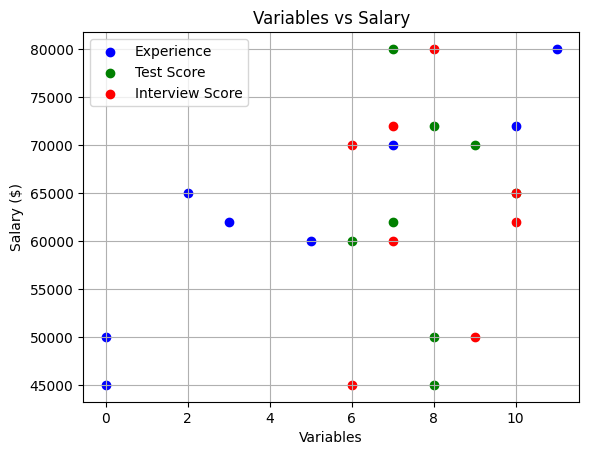

In [71]:
# Plotting 'experience' against 'salary($)'
plt.scatter(data['experience'], data['salary($)'], color='blue', label='Experience')

# Plotting 'test_score(out of 10)' against 'salary($)'
plt.scatter(data['test_score(out of 10)'], data['salary($)'], color='green', label='Test Score')

# Plotting 'interview_score(out of 10)' against 'salary($)'
plt.scatter(data['interview_score(out of 10)'], data['salary($)'], color='red', label='Interview Score')

plt.xlabel('Variables')
plt.ylabel('Salary ($)')
plt.title('Variables vs Salary')
plt.legend()
plt.grid(True)
plt.show()

### Creating a Pair Plot

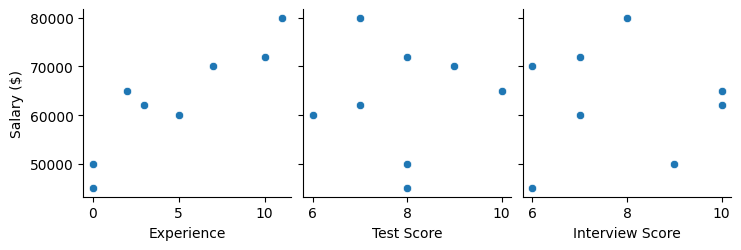

In [68]:
import seaborn as sns
# Create pairplot
pair_plot = sns.pairplot(data, x_vars=['experience', 'test_score(out of 10)', 'interview_score(out of 10)'], y_vars=['salary($)'])

# Set axis labels for each individual axis
pair_plot.axes[0, 0].set_xlabel('Experience')
pair_plot.axes[0, 0].set_ylabel('Salary ($)')

pair_plot.axes[0, 1].set_xlabel('Test Score')
pair_plot.axes[0, 1].set_ylabel('Salary ($)')

pair_plot.axes[0, 2].set_xlabel('Interview Score')
pair_plot.axes[0, 2].set_ylabel('Salary ($)')

plt.show()

### Creating a Heat Map

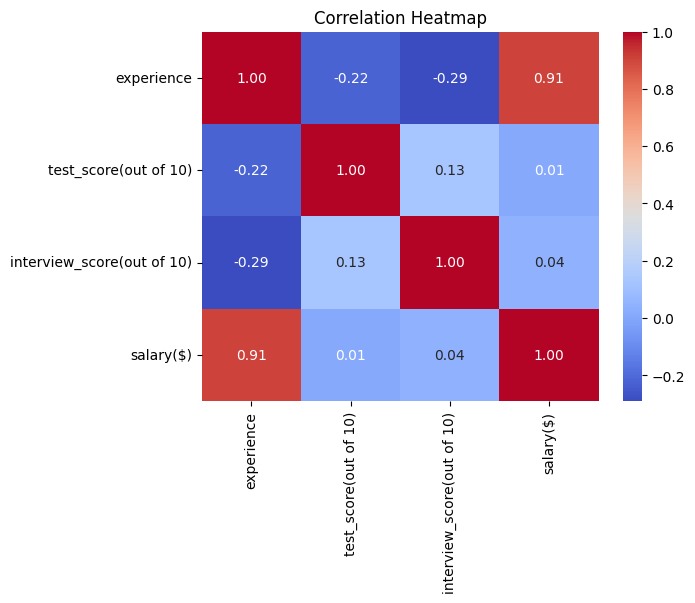

In [70]:
correlation_matrix = data[['experience', 'test_score(out of 10)', 'interview_score(out of 10)', 'salary($)']].corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()